In [1]:
import json
import re

import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 중독_naver_kin_929.json'
    
f = open(openFileName, 'r', encoding='utf-8').read()

jsonData = json.loads(f)
data = ''

for item in jsonData:
    if 'description' in item.keys():
        data = data + re.sub(r'[^\w]', ' ', item['description']) + ' '

# f.close()

In [3]:
print(data)

    저는 금연을 목표로  b 전자담배  b 를 입문하는것이 아닌   개인의 호기심으로 해보고싶은것 뿐이라 괜히  b 전자담배  b 로 장난감처럼 쓰려다  b 중독  b 되는건 아닌지 조금 걱정되네요   안녕하세요 간단하게나마 답변드리겠습니다  1 네 무니코틴         담배나  b 전자담배  b 의  b 중독  b 성은 니코틴성분때문입니다   무니코틴이면  b 중독  b 이 안되요    2   b 전자담배  b 의 유해성은 아직 논란중이고   세계보건기구에서는  b 전자담배  b 도 강력하게 규제해야 한다고 주장하고 있습니다    얼마전     19살 입니다 중2때부터 3년정도 담배를 피우다가 끊을라고 전담을 피웠는데 너무 심하게  b 중독  b 되서 담배 냄세도 싫고 담배 생각은 안나는데  b 전자담배  b 만 1년넘게 피고있습니다  니코틴을 넣어서 피다보니까 그런거 같은데 보건소         끊으려고  b 전자담배  b 를 시작하셨거든요 근데  b 전자담배  b 가 향이 맵지 않고 달달하고 그러니까 집에서 필 수 있게 돼서    가족중에 술 b 중독  b 이 있으시면   가족들에게도 미치는 영향이 커서  quot 가족병 quot 이라고 합니다  당사자 스스로 치료기관에         사용  b 중 독  b 성 슬러지 청소가 가능   제어기능 없이 잘 타는 솜을 용기로 하여 이 솜 중앙에 박힌 고발열열선으로 액상을 무화시키는 솜코일  b 전자담배  b  기종 디자인 위주 다 품종  제품 가지 수가 4만 여 가지에 이르고  주로 고전력         juul이란 제품을 위시한 그 짝퉁들로  그 이름도 첨단 느낌이 드는 csv형 밀폐 시스템 무화장치   b 전자담배  b 라고 하며 달달한 맛과 함께 미국 청소년을 전염병 수준의 니코틴  b 중독  b 에 이르게 했다 하니  정말 어이가 없습니다  이런 제품의      b 전자담배  b 한번 펴도  b 중독  b 되나요  그냥 담배보다 그나마 괜찮다고해서  그래도 담배성분중 니코틴이 들어있어  b 중독  

In [4]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]



In [5]:
data=tokenizer(data)

In [6]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [7]:
print(X)

  (0, 262)	1
  (1, 732)	1
  (2, 1746)	1
  (3, 1644)	1
  (4, 79)	1
  (5, 2287)	1
  (6, 1746)	1
  (7, 1701)	1
  (8, 1862)	1
  (9, 1807)	1
  (10, 95)	1
  (11, 461)	1
  (12, 402)	1
  (13, 453)	1
  (14, 1746)	1
  (15, 1862)	1
  (16, 1081)	1
  (17, 402)	1
  (18, 1078)	1
  (19, 578)	1
  (20, 402)	1
  (21, 1862)	1
  (22, 1746)	1
  (23, 1515)	1
  (24, 1081)	1
  :	:
  (17336, 2105)	1
  (17337, 262)	1
  (17338, 1746)	1
  (17339, 402)	1
  (17340, 2105)	1
  (17341, 402)	1
  (17342, 1072)	1
  (17343, 453)	1
  (17344, 483)	1
  (17345, 1686)	1
  (17346, 1768)	1
  (17347, 642)	1
  (17348, 1862)	1
  (17349, 453)	1
  (17350, 1912)	1
  (17351, 1080)	1
  (17352, 1054)	1
  (17353, 806)	1
  (17354, 1746)	1
  (17355, 262)	1
  (17356, 884)	1
  (17357, 1331)	1
  (17358, 10)	1
  (17359, 453)	1
  (17360, 453)	1


In [8]:
print(vectorize.vocabulary_)

{'금연': 262, '목표': 732, '전자담배': 1746, '입문': 1644, '개인': 79, '호기심': 2287, '장난감': 1701, '중독': 1862, '조금': 1807, '걱정': 95, '답변': 461, '니코틴': 402, '담배': 453, '성은': 1081, '성분': 1078, '때문': 578, '유해': 1515, '논란중': 380, '세계보건기구': 1091, '규제': 225, '주장': 1848, '얼마': 1367, '전담': 1733, '생각': 1038, '보건소': 868, '시작': 1186, '달달': 442, '가족': 33, '영향': 1428, '커서': 2033, '당사자': 465, '스스로': 1163, '치료': 2014, '기관': 274, '사용': 990, '슬러지': 1170, '청소': 1959, '가능': 9, '제어': 1796, '기능': 277, '용기': 1466, '중앙': 1865, '고발': 142, '열선': 1421, '코일': 2045, '디자인': 570, '위주': 1497, '품종': 2147, '제품': 1805, '가지': 35, '수가': 1131, '주로': 1831, '전력': 1736, '이란': 1556, '위시': 1496, '짝퉁': 1920, '이름': 1559, '첨단': 1955, '느낌': 394, '밀폐': 789, '시스템': 1182, '장치': 1710, '미국': 779, '청소년': 1961, '전염병': 1742, '수준': 1143, '하니': 2181, '정말': 1769, '어이': 1350, '한번': 2206, '그냥': 230, '위험': 1501, '피지': 2168, '정도': 1768, '의지': 1543, '라면': 587, '또한': 582, '포함': 2133, '여부': 1390, '농도': 381, '영국': 1425, '보조': 884, '상형': 1033, '권유': 221, '연구': 140

In [9]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'금연': 483,
 '목표': 1,
 '전자담배': 1397,
 '입문': 11,
 '개인': 4,
 '호기심': 26,
 '장난감': 2,
 '중독': 1134,
 '조금': 19,
 '걱정': 28,
 '답변': 30,
 '니코틴': 936,
 '담배': 1004,
 '성은': 12,
 '성분': 72,
 '때문': 157,
 '유해': 41,
 '논란중': 1,
 '세계보건기구': 2,
 '규제': 75,
 '주장': 2,
 '얼마': 18,
 '전담': 36,
 '생각': 95,
 '보건소': 25,
 '시작': 42,
 '달달': 3,
 '가족': 8,
 '영향': 18,
 '커서': 1,
 '당사자': 1,
 '스스로': 12,
 '치료': 13,
 '기관': 2,
 '사용': 181,
 '슬러지': 7,
 '청소': 2,
 '가능': 3,
 '제어': 1,
 '기능': 12,
 '용기': 2,
 '중앙': 1,
 '고발': 2,
 '열선': 1,
 '코일': 39,
 '디자인': 5,
 '위주': 2,
 '품종': 1,
 '제품': 118,
 '가지': 38,
 '수가': 8,
 '주로': 4,
 '전력': 114,
 '이란': 1,
 '위시': 1,
 '짝퉁': 1,
 '이름': 3,
 '첨단': 1,
 '느낌': 42,
 '밀폐': 1,
 '시스템': 1,
 '장치': 12,
 '미국': 128,
 '청소년': 14,
 '전염병': 4,
 '수준': 22,
 '하니': 9,
 '정말': 39,
 '어이': 1,
 '한번': 52,
 '그냥': 70,
 '위험': 15,
 '피지': 17,
 '정도': 108,
 '의지': 56,
 '라면': 16,
 '또한': 25,
 '포함': 27,
 '여부': 3,
 '농도': 8,
 '영국': 4,
 '보조': 55,
 '상형': 78,
 '권유': 5,
 '연구': 8,
 '결과': 27,
 '용법': 2,
 '아이폰': 2,
 '혁신': 4,
 '아이콘': 2,
 '대내': 2,
 '현재': 25

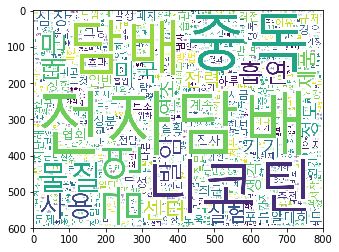

In [12]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [13]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'금연': 262, '목표': 732, '전자담배': 1746, '입문': 1644, '개인': 79, '호기심': 2287, '장난감': 1701, '중독': 1862, '조금': 1807, '걱정': 95, '답변': 461, '니코틴': 402, '담배': 453, '성은': 1081, '성분': 1078, '때문': 578, '유해': 1515, '논란중': 380, '세계보건기구': 1091, '규제': 225, '주장': 1848, '얼마': 1367, '전담': 1733, '생각': 1038, '보건소': 868, '시작': 1186, '달달': 442, '가족': 33, '영향': 1428, '커서': 2033, '당사자': 465, '스스로': 1163, '치료': 2014, '기관': 274, '사용': 990, '슬러지': 1170, '청소': 1959, '가능': 9, '제어': 1796, '기능': 277, '용기': 1466, '중앙': 1865, '고발': 142, '열선': 1421, '코일': 2045, '디자인': 570, '위주': 1497, '품종': 2147, '제품': 1805, '가지': 35, '수가': 1131, '주로': 1831, '전력': 1736, '이란': 1556, '위시': 1496, '짝퉁': 1920, '이름': 1559, '첨단': 1955, '느낌': 394, '밀폐': 789, '시스템': 1182, '장치': 1710, '미국': 779, '청소년': 1961, '전염병': 1742, '수준': 1143, '하니': 2181, '정말': 1769, '어이': 1350, '한번': 2206, '그냥': 230, '위험': 1501, '피지': 2168, '정도': 1768, '의지': 1543, '라면': 587, '또한': 582, '포함': 2133, '여부': 1390, '농도': 381, '영국': 1425, '보조': 884, '상형': 1033, '권유': 221, '연구': 140

In [14]:
freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict(freqs_TFIDF)

{'금연': 483.0,
 '목표': 1.0,
 '전자담배': 1397.0,
 '입문': 11.0,
 '개인': 4.0,
 '호기심': 26.0,
 '장난감': 2.0,
 '중독': 1134.0,
 '조금': 19.0,
 '걱정': 28.0,
 '답변': 30.0,
 '니코틴': 936.0,
 '담배': 1004.0,
 '성은': 12.0,
 '성분': 72.0,
 '때문': 157.0,
 '유해': 41.0,
 '논란중': 1.0,
 '세계보건기구': 2.0,
 '규제': 75.0,
 '주장': 2.0,
 '얼마': 18.0,
 '전담': 36.0,
 '생각': 95.0,
 '보건소': 25.0,
 '시작': 42.0,
 '달달': 3.0,
 '가족': 8.0,
 '영향': 18.0,
 '커서': 1.0,
 '당사자': 1.0,
 '스스로': 12.0,
 '치료': 13.0,
 '기관': 2.0,
 '사용': 181.0,
 '슬러지': 7.0,
 '청소': 2.0,
 '가능': 3.0,
 '제어': 1.0,
 '기능': 12.0,
 '용기': 2.0,
 '중앙': 1.0,
 '고발': 2.0,
 '열선': 1.0,
 '코일': 39.0,
 '디자인': 5.0,
 '위주': 2.0,
 '품종': 1.0,
 '제품': 118.0,
 '가지': 38.0,
 '수가': 8.0,
 '주로': 4.0,
 '전력': 114.0,
 '이란': 1.0,
 '위시': 1.0,
 '짝퉁': 1.0,
 '이름': 3.0,
 '첨단': 1.0,
 '느낌': 42.0,
 '밀폐': 1.0,
 '시스템': 1.0,
 '장치': 12.0,
 '미국': 128.0,
 '청소년': 14.0,
 '전염병': 4.0,
 '수준': 22.0,
 '하니': 9.0,
 '정말': 39.0,
 '어이': 1.0,
 '한번': 52.0,
 '그냥': 70.0,
 '위험': 15.0,
 '피지': 17.0,
 '정도': 108.0,
 '의지': 56.0,
 '라면': 16.0,
 '또한': 25.0,
 

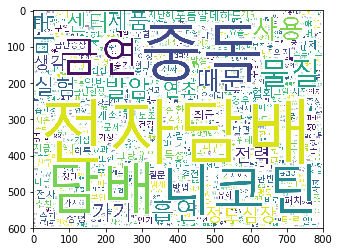

In [15]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()